<a href="https://colab.research.google.com/github/justinwender/Data-Analytics-for-Economics/blob/main/Lab_2/Lab_2_Deflating_History_With_FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fredapi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

In [10]:
fred = Fred(api_key = '')

In [ ]:
# 1. Fetch the data series
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [ ]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # fetch most recent CPI data
    cpi_today = cpi_col.iloc[-1]

    # equation for real wage
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# create new col for real wage
df["real_wage"] = get_real_wage(df['Nominal_Wage'], df['CPI'])

print(df.tail)


<bound method NDFrame.tail of             Nominal_Wage      CPI  Real_Wage  real_wage
1964-01-01          2.50   30.940  26.343730  26.343730
1964-02-01          2.50   30.910  26.369298  26.369298
1964-03-01          2.51   30.940  26.449105  26.449105
1964-04-01          2.52   30.950  26.545900  26.545900
1964-05-01          2.52   30.980  26.520194  26.520194
...                  ...      ...        ...        ...
2025-07-01         31.35  322.132  31.729355  31.729355
2025-08-01         31.45  323.364  31.709292  31.709292
2025-09-01         31.52  324.368  31.681502  31.681502
2025-11-01         31.73  325.031  31.827524  31.827524
2025-12-01         31.76  326.030  31.760000  31.760000

[743 rows x 4 columns]>


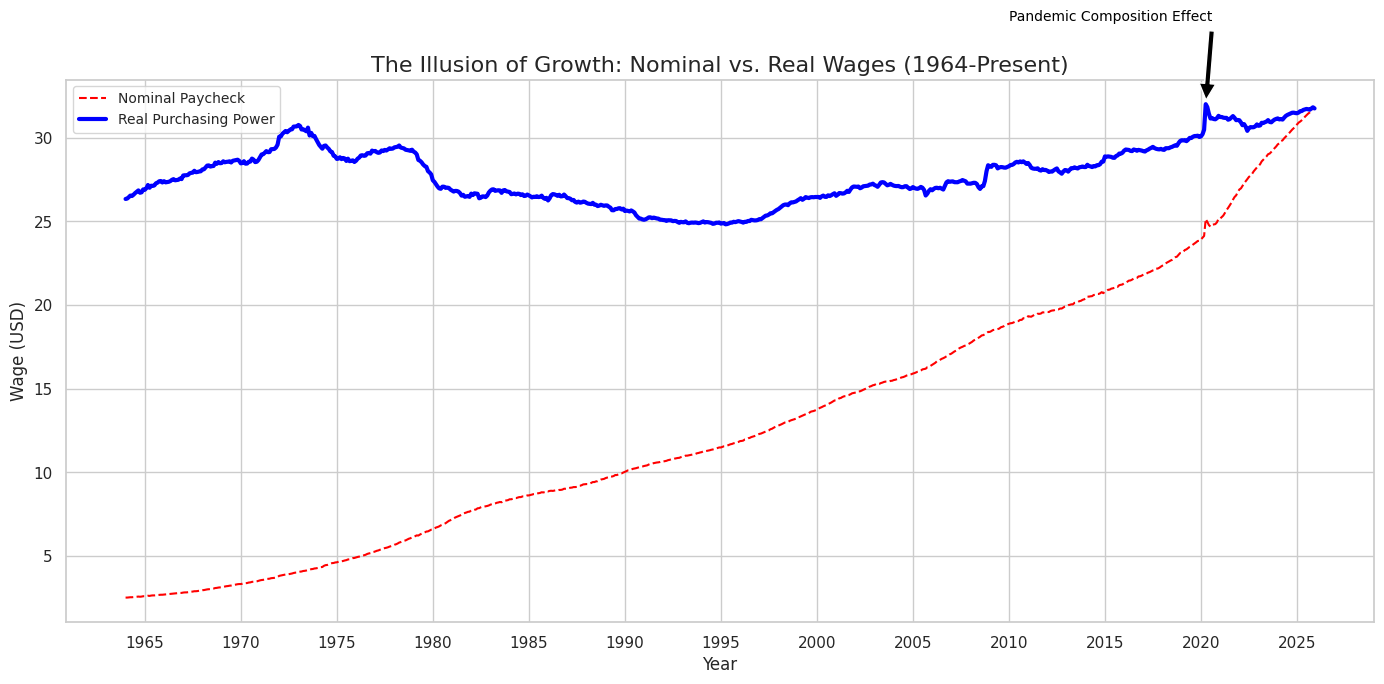

In [8]:
import seaborn as sns

# Set Seaborn style
sns.set_theme(style='whitegrid')

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Nominal Wage
plt.plot(df.index, df['Nominal_Wage'], label='Nominal Paycheck', color='red', linestyle='--', linewidth=1.5)

# Plot Real Wage
plt.plot(df.index, df['real_wage'], label='Real Purchasing Power', color='blue', linewidth=3)

# Add title and labels
plt.title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wage (USD)', fontsize=12)
plt.legend(fontsize=10)

# Add annotation for 2020 spike in Real Wages
# Find the index for the 2020 spike in real wages
pandemic_spike_date = '2020-04-01' # Adjust date if needed based on actual spike in data
if pandemic_spike_date in df.index:
    spike_value_real = df.loc[pandemic_spike_date, 'real_wage']
    plt.annotate(
        'Pandemic Composition Effect',
        xy=(pd.to_datetime(pandemic_spike_date), spike_value_real),
        xytext=(pd.to_datetime('2010-01-01'), spike_value_real + 5), # Adjust xytext for positioning
        arrowprops=dict(facecolor='black', shrink=0.05),
        fontsize=10,
        color='black'
    )
else:
    print(f"Warning: Date {pandemic_spike_date} not found in DataFrame index for annotation.")


# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(5)) # Show every 5 years

plt.grid(True)
plt.tight_layout()
plt.show()

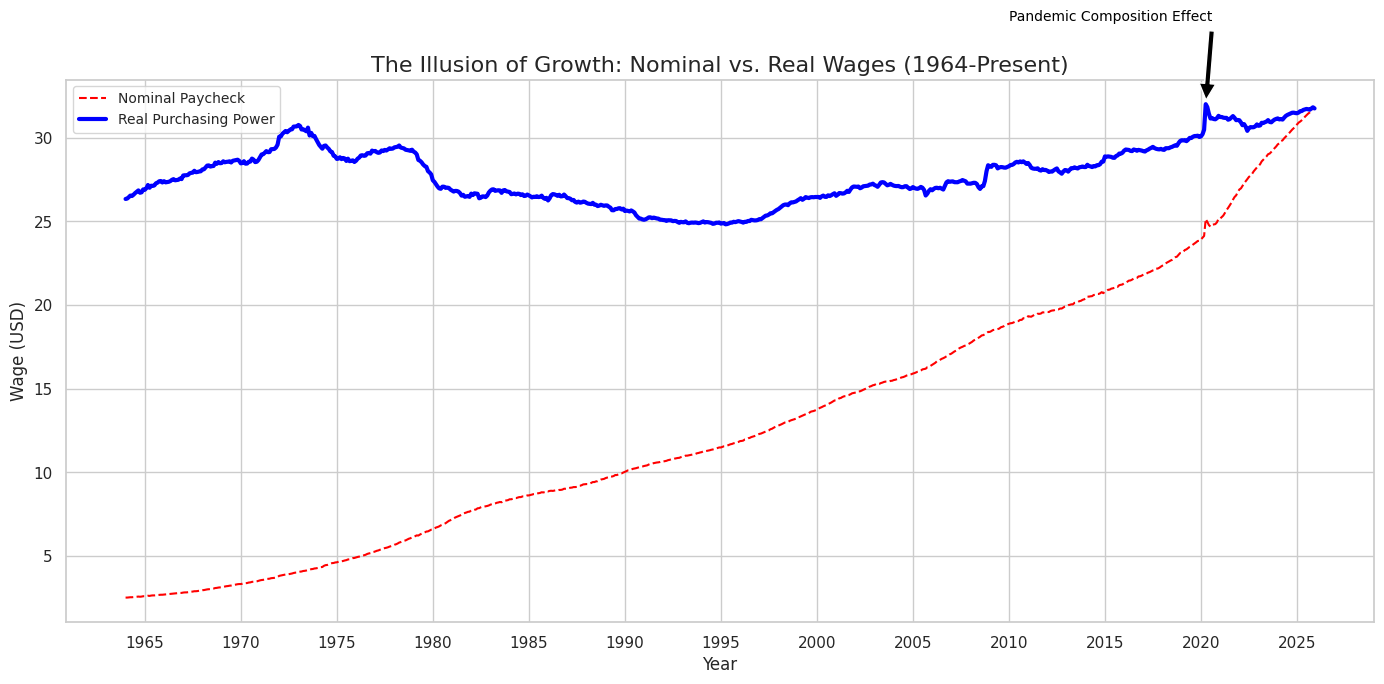

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_theme(style='whitegrid')

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Nominal Wage
plt.plot(df.index, df['Nominal_Wage'], label='Nominal Paycheck', color='red', linestyle='--', linewidth=1.5)

# Plot Real Wage
plt.plot(df.index, df['real_wage'], label='Real Purchasing Power', color='blue', linewidth=3)

# Add title and labels
plt.title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wage (USD)', fontsize=12)
plt.legend(fontsize=10)

# Add annotation for 2020 spike in Real Wages
pandemic_spike_date = '2020-04-01'
if pandemic_spike_date in df.index:
    spike_value_real = df.loc[pandemic_spike_date, 'real_wage']
    plt.annotate(
        'Pandemic Composition Effect',
        xy=(pd.to_datetime(pandemic_spike_date), spike_value_real),
        xytext=(pd.to_datetime('2010-01-01'), spike_value_real + 5),
        arrowprops=dict(facecolor='black', shrink=0.05),
        fontsize=10,
        color='black'
    )
else:
    print(f"Warning: Date {pandemic_spike_date} not found in DataFrame index for annotation.")

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(5))

plt.grid(True)
plt.tight_layout()
plt.show()

# Solving the "Pandemic Paradox"
Fetch the 'ECIWAG' series, filter both the 'wages' and 'ECIWAG' series to start from 2015-01-01, rebase them to 100, and plot the rebased series on a single chart with an annotation highlighting the divergence around 2020.

## Fetch ECIWAG data

In [11]:
# Use the existing 'fred' object to fetch the 'ECIWAG' series.
eciwag = fred.get_series('ECIWAG')
print("ECIWAG series fetched successfully.")

ECIWAG series fetched successfully.


In [12]:
# Filter both the 'wages' and 'ECIWAG' series to start from '2015-01-01'.
start_date = '2015-01-01'
wages_filtered = wages[wages.index >= start_date]
print("Wages series filtered from 2015-01-01.")
print(wages_filtered.head())

Wages series filtered from 2015-01-01.
2015-01-01    20.80
2015-02-01    20.84
2015-03-01    20.91
2015-04-01    20.92
2015-05-01    20.98
dtype: float64


In [13]:
# Filter the 'eciwag' series to start from '2015-01-01' using the already defined start_date.
eciwag_filtered = eciwag[eciwag.index >= start_date]
print("ECIWAG series filtered from 2015-01-01.")
print(eciwag_filtered.head())

ECIWAG series filtered from 2015-01-01.
2015-01-01    122.6
2015-04-01    122.8
2015-07-01    123.6
2015-10-01    124.3
2016-01-01    125.1
dtype: float64


In [14]:
# Rebase the filtered 'wages' series to 100
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
print("Wages series rebased to 100.")
print(wages_rebased.head())

Wages series rebased to 100.
2015-01-01    100.000000
2015-02-01    100.192308
2015-03-01    100.528846
2015-04-01    100.576923
2015-05-01    100.865385
dtype: float64


In [15]:
# Rebase the 'eciwag_filtered' series using the same method, dividing by its first value and multiplying by 100.
eciwag_rebased = (eciwag_filtered / eciwag_filtered.iloc[0]) * 100
print("ECIWAG series rebased to 100.")
print(eciwag_rebased.head())

ECIWAG series rebased to 100.
2015-01-01    100.000000
2015-04-01    100.163132
2015-07-01    100.815661
2015-10-01    101.386623
2016-01-01    102.039152
dtype: float64


#Plot



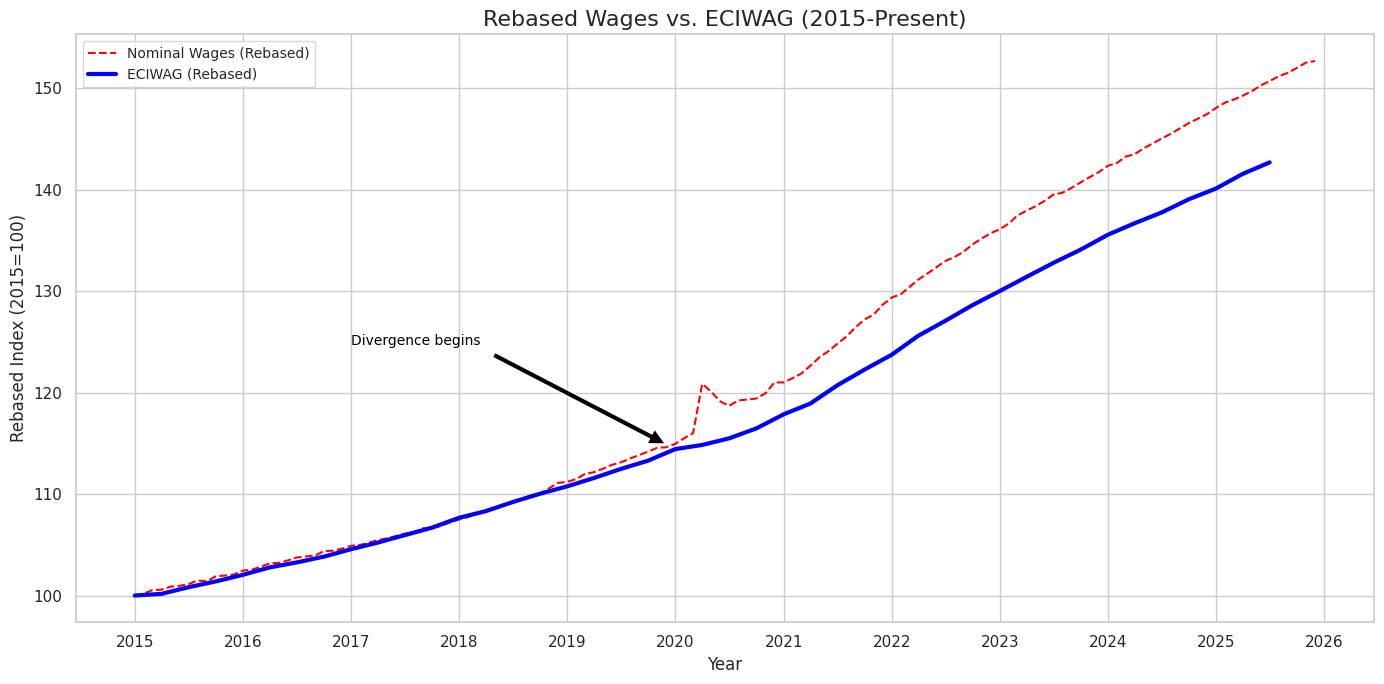

In [16]:
# Set Seaborn style
sns.set_theme(style='whitegrid')

# Create the plot
plt.figure(figsize=(14, 7))

# Plot the rebased series
plt.plot(wages_rebased.index, wages_rebased, label='Nominal Wages (Rebased)', color='red', linestyle='--', linewidth=1.5)
plt.plot(eciwag_rebased.index, eciwag_rebased, label='ECIWAG (Rebased)', color='blue', linewidth=3)

# Add title and labels
plt.title('Rebased Wages vs. ECIWAG (2015-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rebased Index (2015=100)', fontsize=12)
plt.legend(fontsize=10)

# Add annotation for divergence around 2020
divergence_date = '2020-01-01' # Approximate date for divergence

# Check if the date exists in both series index for plotting annotation
if pd.to_datetime(divergence_date) in wages_rebased.index and pd.to_datetime(divergence_date) in eciwag_rebased.index:
    wages_val = wages_rebased.loc[divergence_date]
    eciwag_val = eciwag_rebased.loc[divergence_date]

    # Choose the series that shows more pronounced change or simply average for annotation position
    annotation_y = (wages_val + eciwag_val) / 2 # Example: average y position

    plt.annotate(
        'Divergence begins',
        xy=(pd.to_datetime(divergence_date), eciwag_val), # Point to ECIWAG at divergence_date
        xytext=(pd.to_datetime('2017-01-01'), annotation_y + 10), # Adjust text position
        arrowprops=dict(facecolor='black', shrink=0.05),
        fontsize=10,
        color='black'
    )
else:
    print(f"Warning: Divergence date {divergence_date} not found in one or both rebased series for annotation.")

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1)) # Show every year for recent data

plt.grid(True)
plt.tight_layout()
plt.show()
